## Preprocessing

### retrive data

In [163]:
import pandas as pd

data = pd.read_csv('C:/Users/PC/Documents/python-workspace/ocean-ict/fukushima-dataset/after_measurements_diff_distance_angle.csv')
data = data.drop_duplicates()

type(data)

pandas.core.frame.DataFrame

### data properties

### get feature, target

### train / test data

In [165]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    x, 
    y, 
    test_size = 0.2,
    random_state = 0
)

train_x

,cos,diff,distance,sin
29896,0.112983,377844,98.529038,-0.993597
12756,0.967660,1191875,29.356645,-0.252260
33364,-0.191373,204539,69.301354,-0.981517
38300,0.940712,129912,25.083406,-0.339208
4243,-0.979730,909917,19.228610,-0.200324
...,...,...,...,...
21258,0.490954,916322,63.109328,-0.871186
36822,0.796147,139491,71.906982,-0.605103
35122,0.170290,144426,58.616457,-0.985394
22231,0.227002,913870,58.405397,-0.973894


## Regression model

### fit gradient boosting model

In [168]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    random_state=0,
).fit(train_x, train_y)

### prediction score / importance

In [169]:
from sklearn.metrics import r2_score

predict_test_y = gradient_model.predict(test_x)
predict_train_y = gradient_model.predict(train_x)

print(r2_score(train_y, predict_train_y))
print(r2_score(test_y, predict_test_y))

print(f'model : {gradient_model.feature_importances_}')

0.9993220208670341
0.9983064300164919
model : [0.10281475 0.01886051 0.7763313  0.10199344]


## Heatmap

### initialize steps

In [212]:
import numpy as np

time_diff = 0

rad_step = 1000
azm_step = 100

rad_max = 30

FUKUSHIMA_LATITUDE = 37.422972
FUKUSHIMA_LONGITUDE = 141.032917

radius_list = np.linspace(0, rad_max, rad_step)
azmiuth_list = np.linspace(0, 2 * np.pi, azm_step)


### get predict datas

In [213]:
import math

predict_data = np.empty((0, 1000))

for azm in azmiuth_list:
    azm_data = list()

    for rad in radius_list:
        sin = math.sin(azm)
        cos = math.cos(azm)

        azm_data.append([cos, time_diff, rad, sin])
    
    df_data = pd.DataFrame(azm_data, columns=['cos', 'diff', 'distance', 'sin'])
    azm_predict_data = gradient_model.predict(df_data)

    predict_data = np.append(predict_data, [azm_predict_data], axis=0)

### draw heatmap


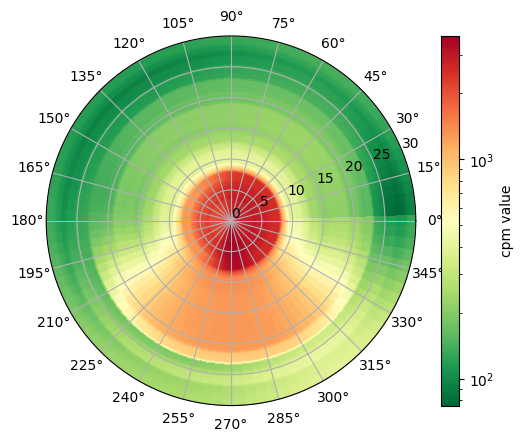

In [220]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.colors as pltcolors
from scipy.ndimage import gaussian_filter

fig = plt.figure()
ax = Axes3D(fig)

r, th = np.meshgrid(radius_list, azmiuth_list)

z = (r ** 2.0) / 4.0

plt.subplot(projection="polar")

df_smooth = gaussian_filter(predict_data, sigma=5)
heatmap = plt.pcolormesh(th, r, df_smooth, cmap='RdYlGn_r', norm=pltcolors.LogNorm())
#plt.pcolormesh(th, z, r)

cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('cpm value')

plt.plot(azmiuth_list, r, color='k', ls='none') 
plt.thetagrids([theta * 15 for theta in range(360//15)], color='k')

plt.show()
